In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import pyreadr

from utils import helpers

from importlib import reload

In [2]:
# Load Outfield Data

outfield_dims = pyreadr.read_r('fences.rds')[None]

outfield_dims['spray_angle'] = outfield_dims.apply(lambda x: helpers.spray_angle(x.x, x.y),1) 

outfield_dims['team_abv'] = outfield_dims['team'].apply(lambda x: helpers.mapping[x])

In [3]:
outfield_dims.to_csv('fences.csv')

In [8]:
new_dims.query('team == "angels" and segment == "outfield_outer"')

,team,x,y,segment
401,angels,26.270000,104.810000,outfield_outer
402,angels,25.932060,98.807795,outfield_outer
403,angels,26.551758,92.865560,outfield_outer
404,angels,29.069971,87.457350,outfield_outer
405,angels,32.986155,82.913310,outfield_outer
...,...,...,...,...
496,angels,32.618710,127.222803,outfield_outer
497,angels,29.003184,122.419820,outfield_outer
498,angels,27.310342,116.780127,outfield_outer
499,angels,26.598417,110.812734,outfield_outer


In [9]:
outfield_dims['segment'].unique()

array(['outfield_outer'], dtype=object)

In [3]:
new_dims = pd.read_csv('data/mlb_stadia_paths.csv')

In [10]:
new_dims

,team,x,y,segment
0,angels,125.180000,204.530000,foul_lines
1,angels,121.153213,200.501574,foul_lines
2,angels,117.126427,196.473147,foul_lines
3,angels,113.099640,192.444721,foul_lines
4,angels,109.072854,188.416295,foul_lines
...,...,...,...,...
15727,generic,128.838384,203.636364,outfield_outer
15728,generic,127.878788,204.727273,outfield_outer
15729,generic,126.919192,205.818182,outfield_outer
15730,generic,125.959596,206.909091,outfield_outer


In [11]:
helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y')

,team,x,y,segment,x_,y_
0,angels,125.180000,204.530000,foul_lines,0.449221,-13.801061
1,angels,121.153213,200.501574,foul_lines,-9.600314,-3.747434
2,angels,117.126427,196.473147,foul_lines,-19.649848,6.306193
3,angels,113.099640,192.444721,foul_lines,-29.699382,16.359819
4,angels,109.072854,188.416295,foul_lines,-39.748917,26.413446
...,...,...,...,...,...,...
15727,generic,128.838384,203.636364,outfield_outer,9.579343,-11.570838
15728,generic,127.878788,204.727273,outfield_outer,7.184507,-14.293388
15729,generic,126.919192,205.818182,outfield_outer,4.789672,-17.015939
15730,generic,125.959596,206.909091,outfield_outer,2.394836,-19.738489


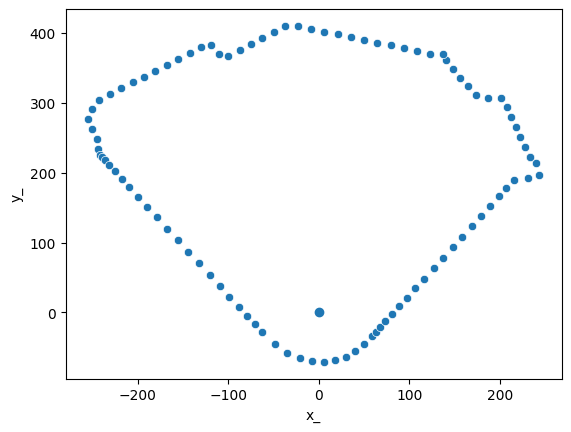

In [12]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "orioles" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')

# get distance from 0,0 to each point for updated stuff

In [13]:
outfield_dims.query('stadium == "Oriole Park at Camden Yards"')['fence_height'].unique()

array([21.,  7.])

<AxesSubplot: xlabel='x', ylabel='y'>

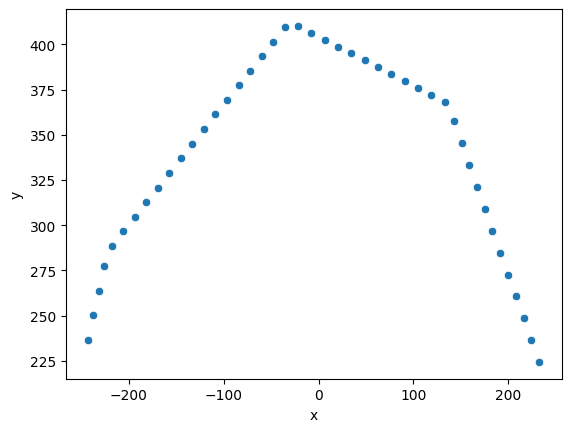

In [14]:
sns.scatterplot(outfield_dims.query('stadium == "Oriole Park at Camden Yards"'), x='x', y='y')

In [4]:
# Load Hits Data

hits_df = pd.read_csv('data/total_big_hits.csv',index_col=0)

hits_df = (
    hits_df.assign(game_date = pd.to_datetime(hits_df['game_date'],infer_datetime_format=True))
                 .assign(year = lambda x: x['game_date'].dt.year)
)

hits_df = helpers.mlbam_xy_transformation(hits_df)
hits_df['spray_angle_true'] = hits_df.apply(lambda x: helpers.spray_angle(x.hc_x_, x.hc_y_),1)
hits_df['launch_speed_fts'] = hits_df['launch_speed'] * 5280 / 3600
hits_df['launch_angle_rads'] = np.deg2rad(hits_df['launch_angle']) 

C:\Users\noahs\AppData\Local\Temp\ipykernel_13924\2108306822.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  hits_df = pd.read_csv('data/total_big_hits.csv',index_col=0)


In [5]:
hits_df['num_homers'] = hits_df[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.num_homers(x[0],x[1],x[2],x[3],x[4],x[5]),1)

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:258: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x


KeyboardInterrupt: 

In [94]:
hits_df = pd.read_csv('data/hits_output.csv',index_col=None).drop('Unnamed: 0',1)

C:\Users\noahs\AppData\Local\Temp\ipykernel_9504\4231309284.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  hits_df = pd.read_csv('data/hits_output.csv',index_col=None).drop('Unnamed: 0',1)
C:\Users\noahs\AppData\Local\Temp\ipykernel_9504\4231309284.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hits_df = pd.read_csv('data/hits_output.csv',index_col=None).drop('Unnamed: 0',1)


In [96]:
ids = pd.read_csv('data/players_id.csv')

In [97]:
hits_df = hits_df.merge(ids[['MLBID','PLAYERNAME']],how='left',left_on='batter',right_on='MLBID')

In [98]:
from pybaseball import playerid_reverse_lookup

In [117]:
hits_df['batter_name'] = hits_df['batter'].apply(lambda x: batter_player(x),1)

In [116]:
def batter_player(x):
    try:
        text = ', '.join([part.title() for part in playerid_reverse_lookup(player_ids=[x])[['name_last','name_first']].agg(', '.join,axis=1).item().split(', ')])
    except:
        text = 'NA'
    return text

In [118]:
hits_df = hits_df.query('batter_name.notnull()')

In [122]:
hits_df.to_csv('hits_output.csv')

In [112]:
hits_df = hits_df.query('spray_angle_true.notnull()').reset_index(drop=True)

In [113]:
hits_df['true_homerun'] = hits_df['num_homers'].apply(lambda x: 1 if x == 30 else 0)

In [114]:
hits_df = hits_df.query('game_date > "2022-04-07" and game_date < "2022-10-06"')

In [119]:
aj = hits_df.query('batter_name == "Judge, Aaron" and year == 2022')

In [44]:
aj = pd.read_csv('data/Judge2022.csv').drop('Unnamed: 0',1)

C:\Users\noahs\AppData\Local\Temp\ipykernel_13924\2233745878.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  aj = pd.read_csv('data/Judge2022.csv').drop('Unnamed: 0',1)


In [74]:
aj = aj.query('game_date > "2022-04-07" and game_date < "2022-10-06"')

In [39]:
aj

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,year,hc_x_,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name
9,FF,2022-10-04,97.3,-1.90,5.64,"Gray, Jon",592450,592351,field_out,hit_into_play,...,2022,108.137424,296.635455,20.029151,139.773333,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron"
10,SL,2022-10-04,88.4,-1.71,5.69,"Tinoco, Jesus",592450,622786,home_run,hit_into_play,...,2022,-217.073464,329.927706,-33.342618,146.960000,0.610865,30,592450.0,Aaron Judge,"Judge, Aaron"
11,SI,2022-09-28,94.5,1.78,6.46,"Mayza, Tim",592450,641835,home_run,hit_into_play,...,2022,-181.684849,335.842446,-28.412607,172.186667,0.383972,30,592450.0,Aaron Judge,"Judge, Aaron"
12,SL,2022-09-25,85.9,-1.79,5.62,"Bello, Brayan",592450,678394,field_out,hit_into_play,...,2022,-86.450043,329.104135,-14.718110,144.906667,0.767945,0,592450.0,Aaron Judge,"Judge, Aaron"
13,FF,2022-09-24,95.1,-1.28,6.64,"Pivetta, Nick",592450,601713,field_out,hit_into_play,...,2022,16.820823,350.541949,2.747242,158.546667,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,FF,2022-04-14,96.0,-2.54,5.87,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,2022,-20.514416,368.111473,-3.189726,144.320000,0.488692,0,592450.0,Aaron Judge,"Judge, Aaron"
176,FF,2022-04-14,94.2,-2.46,5.91,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,2022,61.568204,332.123897,10.502114,134.200000,0.471239,0,592450.0,Aaron Judge,"Judge, Aaron"
177,SI,2022-04-13,91.9,-3.18,5.21,"Berríos, José",592450,621244,home_run,hit_into_play,...,2022,-180.611710,375.922923,-25.661900,158.986667,0.471239,30,592450.0,Aaron Judge,"Judge, Aaron"
178,FC,2022-04-12,91.1,1.12,5.50,"Kikuchi, Yusei",592450,579328,field_out,hit_into_play,...,2022,-196.309481,307.691278,-32.538199,140.360000,0.506145,11,592450.0,Aaron Judge,"Judge, Aaron"


In [7]:
aj['home_team']

0      NYY
1      HOU
2      HOU
3      NYY
4      CLE
      ... 
183    NYY
184    NYY
185    NYY
186    NYY
187    NYY
Name: home_team, Length: 188, dtype: object

In [8]:
aj['game_date'].min()

'2022-03-21'

In [9]:
aj.query('events != "home_run"')['num_homers'].value_counts()

0     101
2       5
1       5
11      3
5       2
17      1
15      1
30      1
23      1
Name: num_homers, dtype: int64

In [10]:
aj.query('num_homers == 1')[['game_date','player_name','events']]

,game_date,player_name,events
14,2022-09-23,"Hill, Rich",field_out
54,2022-08-08,"Gilbert, Logan",field_out
68,2022-07-27,"Scherzer, Max",field_out
105,2022-06-14,"Kluber, Corey",field_out
182,2022-04-04,"Gibson, Kyle",double
183,2022-04-02,"Strider, Spencer",home_run
185,2022-03-27,"Brubaker, JT",home_run


In [11]:
aj.query('events != "home_run" and num_homers == 30')

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,year,hc_x_,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name
141,ST,2022-05-17,78.8,-1.88,6.36,"Watkins, Spenser",592450,657093,double,hit_into_play,...,2022,-148.667121,314.155065,-25.324845,147.84,0.523599,30,592450.0,Aaron Judge,"Judge, Aaron"


In [12]:
aj.groupby('home_team').agg(sum_true_hr=('true_homerun','sum')).reset_index().sort_values('sum_true_hr',ascending=False)

KeyError: "Column(s) ['true_homerun'] do not exist"

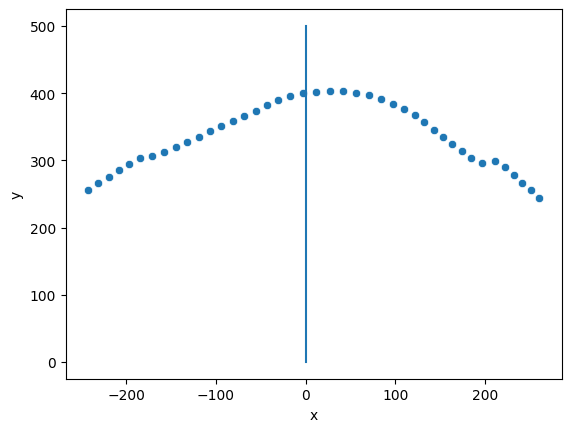

<AxesSubplot: xlabel='spray_angle_true', ylabel='Count'>

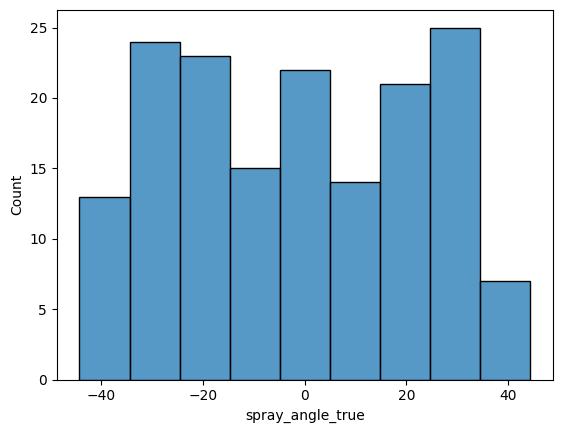

In [13]:
sns.histplot(aj['spray_angle_true'])

KeyError: 'true_homerun'

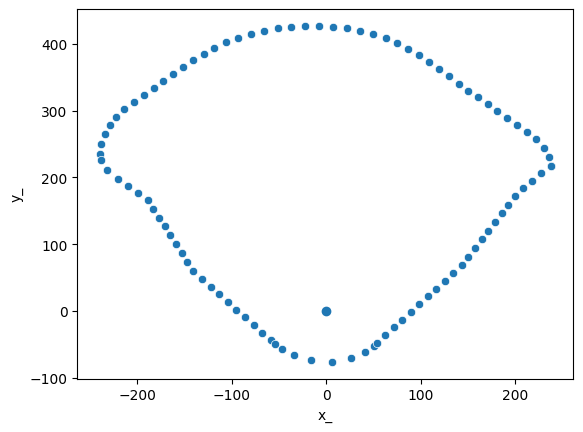

In [14]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['true_homerun']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [ ]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['true_homerun']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [137]:
hits_df['home_team'].unique()

array(['BAL', 'BOS', 'CIN', 'CLE', 'HOU', 'LAD', 'NYM', 'OAK', 'PIT',
       'SD', 'SEA', 'TEX', 'CWS', 'MIA', 'MIL', 'LAA', 'CHC', 'DET', 'SF',
       'STL', 'TOR', 'ATL', 'NYY', 'WSH', 'MIN', 'AZ', 'COL', 'KC', 'TB',
       'PHI'], dtype=object)

In [36]:
reload(helpers)

<module 'utils.helpers' from 'c:\\Users\\noahs\\Documents\\Projects\\YouTube-Code\\utils\\helpers.py'>

In [45]:
hr_count = []
for t in hits_df['home_team'].unique():
    hr_count.append(aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team','events']].apply(lambda x: helpers.is_home_run_new_team(x[0],x[1],x[2],x[3],x[4],x[5],t,x[6]),1).sum())

pd.DataFrame(zip(hits_df['home_team'].unique(), hr_count), columns=['Stadium','HR Count']).sort_values('HR Count',ascending=False).reset_index(drop=True)

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:299: RuntimeWarning: inv

,Stadium,HR Count
0,CIN,77
1,MIN,71
2,COL,70
3,MIL,70
4,CHC,68
5,PHI,68
6,SEA,68
7,PIT,68
8,ATL,67
9,CLE,67


In [46]:
hr_count2 = []
for t in hits_df['home_team'].unique():
    hr_count2.append(aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run_new_team2(x[0],x[1],x[2],x[3],x[4],x[5],t),1).sum())

pd.DataFrame(zip(hits_df['home_team'].unique(), hr_count2), columns=['Stadium','HR Count']).sort_values('HR Count',ascending=False).reset_index(drop=True)

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:334: RuntimeWarning: inv

,Stadium,HR Count
0,CIN,77
1,MIN,72
2,MIL,70
3,COL,70
4,PHI,68
5,SEA,68
6,PIT,68
7,CHC,68
8,CWS,67
9,SD,67


In [66]:
# Scheduling

sched = pd.read_csv('data/mlb_sched.csv')

In [65]:
def judge_sched(team, mlb_sched, judge_game_map):
    team_sched = mlb_sched[mlb_sched['Tm']==team]
    judge_game_map = judge_game_map.merge(team_sched[['Game_Num','Field']],left_on='Game_Num',right_on='Game_Num')
    return judge_game_map

In [73]:
aj

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,hc_x_,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name,temp_hr
9,FF,2022-10-04,97.3,-1.90,5.64,"Gray, Jon",592450,592351,field_out,hit_into_play,...,108.137424,296.635455,20.029151,139.773333,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0
10,SL,2022-10-04,88.4,-1.71,5.69,"Tinoco, Jesus",592450,622786,home_run,hit_into_play,...,-217.073464,329.927706,-33.342618,146.960000,0.610865,30,592450.0,Aaron Judge,"Judge, Aaron",1
11,SI,2022-09-28,94.5,1.78,6.46,"Mayza, Tim",592450,641835,home_run,hit_into_play,...,-181.684849,335.842446,-28.412607,172.186667,0.383972,30,592450.0,Aaron Judge,"Judge, Aaron",1
12,SL,2022-09-25,85.9,-1.79,5.62,"Bello, Brayan",592450,678394,field_out,hit_into_play,...,-86.450043,329.104135,-14.718110,144.906667,0.767945,0,592450.0,Aaron Judge,"Judge, Aaron",0
13,FF,2022-09-24,95.1,-1.28,6.64,"Pivetta, Nick",592450,601713,field_out,hit_into_play,...,16.820823,350.541949,2.747242,158.546667,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,FF,2022-04-14,96.0,-2.54,5.87,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,-20.514416,368.111473,-3.189726,144.320000,0.488692,0,592450.0,Aaron Judge,"Judge, Aaron",0
176,FF,2022-04-14,94.2,-2.46,5.91,"Gausman, Kevin",592450,592332,field_out,hit_into_play,...,61.568204,332.123897,10.502114,134.200000,0.471239,0,592450.0,Aaron Judge,"Judge, Aaron",0
177,SI,2022-04-13,91.9,-3.18,5.21,"Berríos, José",592450,621244,home_run,hit_into_play,...,-180.611710,375.922923,-25.661900,158.986667,0.471239,30,592450.0,Aaron Judge,"Judge, Aaron",1
178,FC,2022-04-12,91.1,1.12,5.50,"Kikuchi, Yusei",592450,579328,field_out,hit_into_play,...,-196.309481,307.691278,-32.538199,140.360000,0.506145,11,592450.0,Aaron Judge,"Judge, Aaron",0


In [76]:
aj.merge(pd.read_csv('data/judge_hit_map.csv')[['hc_x','hc_y','Game_Num']], left_on=['hc_x','hc_y'], right_on=['hc_x','hc_y'], how='left').head(20)

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name,temp_hr,Game_Num
0,FF,2022-10-04,97.3,-1.90,5.64,"Gray, Jon",592450,592351,field_out,hit_into_play,...,296.635455,20.029151,139.773333,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0,160
1,SL,2022-10-04,88.4,-1.71,5.69,"Tinoco, Jesus",592450,622786,home_run,hit_into_play,...,329.927706,-33.342618,146.960000,0.610865,30,592450.0,Aaron Judge,"Judge, Aaron",1,161
2,SI,2022-09-28,94.5,1.78,6.46,"Mayza, Tim",592450,641835,home_run,hit_into_play,...,335.842446,-28.412607,172.186667,0.383972,30,592450.0,Aaron Judge,"Judge, Aaron",1,155
3,SL,2022-09-25,85.9,-1.79,5.62,"Bello, Brayan",592450,678394,field_out,hit_into_play,...,329.104135,-14.718110,144.906667,0.767945,0,592450.0,Aaron Judge,"Judge, Aaron",0,152
4,FF,2022-09-24,95.1,-1.28,6.64,"Pivetta, Nick",592450,601713,field_out,hit_into_play,...,350.541949,2.747242,158.546667,0.750492,0,592450.0,Aaron Judge,"Judge, Aaron",0,151
5,FC,2022-09-23,83.6,1.58,5.68,"Hill, Rich",592450,448179,field_out,hit_into_play,...,313.930455,-22.350576,161.480000,0.767945,1,592450.0,Aaron Judge,"Judge, Aaron",0,150
6,FF,2022-09-22,95.8,-1.65,6.09,"Barnes, Matt",592450,598264,field_out,hit_into_play,...,406.320196,3.532295,165.733333,0.610865,17,592450.0,Aaron Judge,"Judge, Aaron",0,149
7,SL,2022-09-21,83.2,-1.09,5.79,"Contreras, Roansy",592450,672710,double,hit_into_play,...,201.924741,-44.261250,148.280000,0.418879,0,592450.0,Aaron Judge,"Judge, Aaron",0,148
8,SI,2022-09-20,95.3,-2.10,6.05,"Crowe, Wil",592450,640444,home_run,hit_into_play,...,400.380499,-22.958077,163.680000,0.418879,30,592450.0,Aaron Judge,"Judge, Aaron",1,147
9,CU,2022-09-18,80.6,-4.63,3.40,"Kelley, Trevor",592450,665001,double,hit_into_play,...,333.172078,-20.859277,163.973333,0.331613,0,592450.0,Aaron Judge,"Judge, Aaron",0,146


In [72]:
aj[['hc_x','hc_y']]

,hc_x,hc_y
9,168.33,80.14
10,38.02,66.80
11,52.20,64.43
12,90.36,67.13
13,131.74,58.54
...,...,...
175,116.78,51.50
176,149.67,65.92
177,52.63,48.37
178,46.34,75.71


In [71]:
pd.read_csv('data/judge_hit_map.csv')[['hc_x','hc_y','Game_Num']]

,hc_x,hc_y,Game_Num
0,168.33,80.14,160
1,38.02,66.80,161
2,52.20,64.43,155
3,90.36,67.13,152
4,131.74,58.54,151
...,...,...,...
166,116.78,51.50,7
167,149.67,65.92,7
168,52.63,48.37,6
169,46.34,75.71,5


In [60]:
aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']]

,launch_speed_fts,launch_angle_rads,plate_z,hit_distance_sc,spray_angle_true,home_team
0,163.826667,0.383972,2.45,393,5.822182,NYY
1,155.906667,0.488692,2.52,345,33.407825,HOU
2,163.826667,0.314159,2.17,387,2.075000,HOU
3,166.026667,0.715585,3.25,394,19.157646,NYY
4,130.093333,0.541052,3.27,329,-23.145844,CLE
...,...,...,...,...,...,...
183,151.946667,0.418879,3.04,346,34.875227,NYY
184,127.746667,0.523599,3.11,291,21.510944,NYY
185,167.933333,0.296706,2.86,382,18.644625,NYY
186,163.826667,0.541052,2.28,407,-10.246316,NYY


In [66]:
print(type(aj['launch_speed_fts']))
print(type(np.cos(aj['launch_angle_rads'])))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [75]:
aj['temp_hr'] = aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run(x[0],x[1],x[2],x[3],x[4],x[5]),1)

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:246: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
C:\Users\noahs\AppData\Local\Temp\ipykernel_13924\1376173470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj['temp_hr'] = aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run(x[0],x[1],x[2],x[3],x[4],x[5]),1)


In [76]:
aj['temp_hr'].sum()

59

In [77]:
aj[(aj['events'] == 'home_run') & (aj['temp_hr'] == 0)]['home_team']

27     NYY
32      TB
60     NYY
133    NYY
169    NYY
Name: home_team, dtype: object

In [78]:
aj[(aj['events'] != 'home_run') & (aj['temp_hr'] == 1)]['home_team']

112    MIN
141    BAL
Name: home_team, dtype: object

In [158]:
aj.query('spray_angle_true <= 10 and spray_angle_true >= -30 and temp_hr == 1 and hc_y_ <= 350')[['hc_x_','hc_y_']]

,hc_x_,hc_y_
192846,-181.684849,335.842446
215052,-148.667121,314.155065


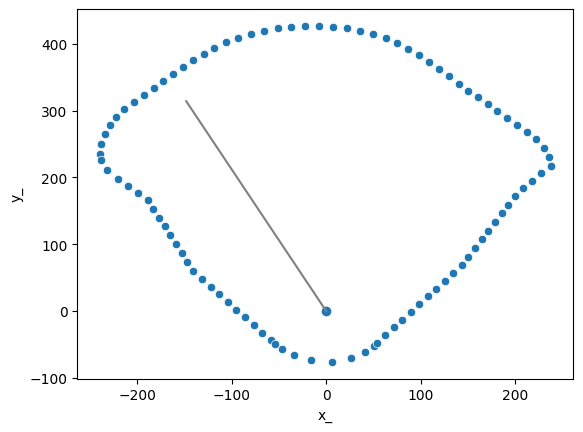

In [149]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
plt.plot([0,-148],[0,314],'grey')


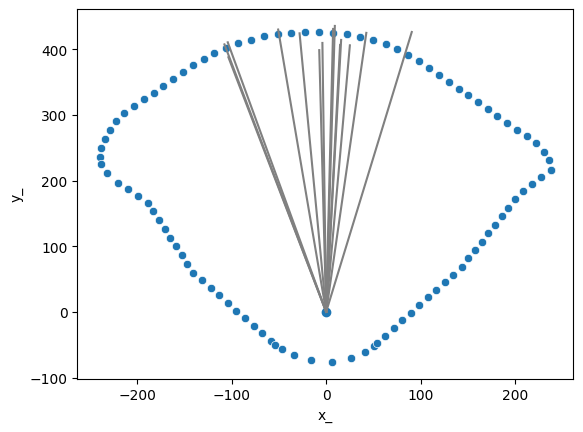

In [179]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
temp = aj.query('hc_x_ >= -120 and hc_x_ <= 100 and temp_hr == 0 and hit_distance_sc >= 395')
for x, y, hr in zip(temp['hc_x_'], temp['hc_y_'],temp['temp_hr']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

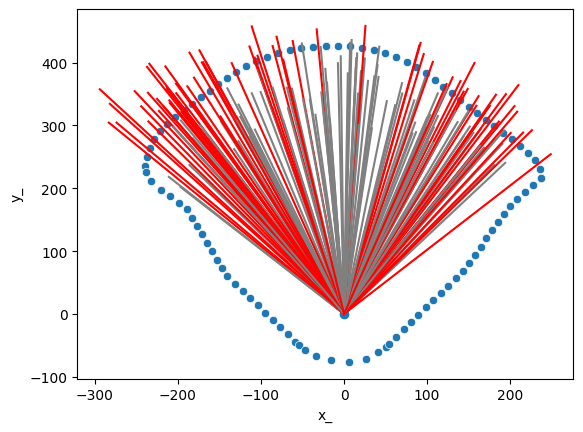

In [43]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['temp_hr']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [48]:
new_dims['segment'].unique()

array(['foul_lines', 'home_plate', 'infield_inner', 'infield_outer',
       'outfield_inner', 'outfield_outer'], dtype=object)

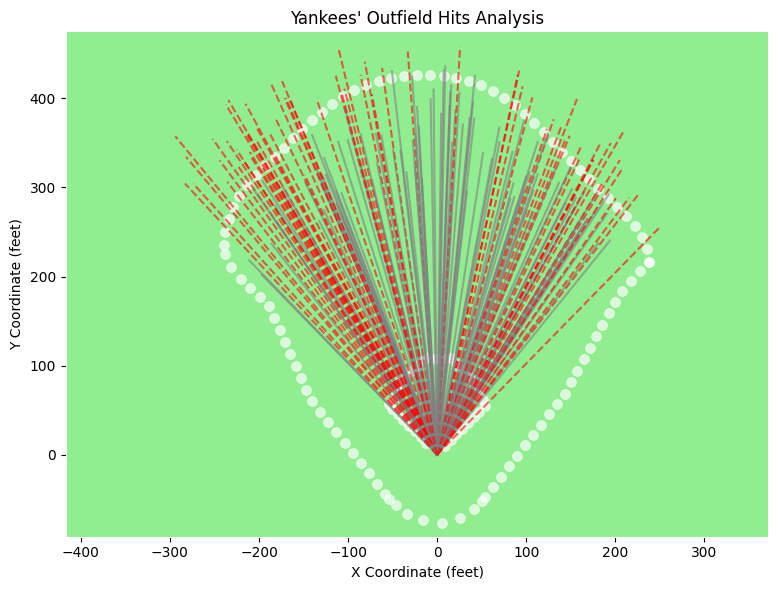

In [62]:
transformed_data = helpers.mlbam_xy_transformation(data=new_dims, x='x', y='y')
yankees_outfield_data = transformed_data.query('team == "yankees" and segment in ("outfield_outer","infield_inner")')

# Create a new figure
plt.figure(figsize=(8,6))
plt.gca().set_facecolor('lightgreen') 

# Scatter plot for hits
sns.scatterplot(data=yankees_outfield_data, x='x_', y='y_', color='white', s=50, edgecolor='white', alpha=0.7)

# Plot trajectories of the hits
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'], aj['temp_hr']):
    color = 'red' if hr else 'grey'
    plt.plot([0, x], [0, y], color=color, alpha=0.6, linestyle='--' if hr else '-')

# Beautify the plot
plt.title("Yankees' Outfield Hits Analysis")
plt.xlabel("X Coordinate (feet)")
plt.ylabel("Y Coordinate (feet)")
plt.axis('equal')  # ensures the same scale on both axes for accurate representation

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

for spine in ['bottom', 'left']:
    plt.gca().spines[spine].set_color('white')

# Display the plot
plt.tight_layout()
plt.show()

In [4]:
# Best power hitter, how is that determined?
# just avg distance?
# highest home run percentage?
# 

<AxesSubplot: >

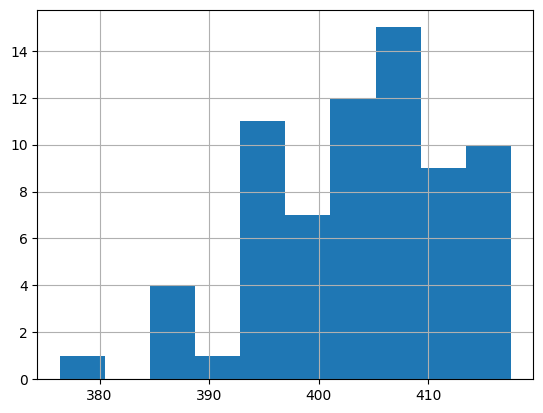

In [12]:
# This is best avg home run hit distance

(
    hits_data.query("events == 'Home Run'")
    .groupby('player_name').agg(avg_hit_dist=('hit_distance_sc','mean'),
                                num_hits=('hit_distance_sc','count'))
    .reset_index()
    .query('num_hits >= 15')
    .sort_values('avg_hit_dist',ascending=False)['avg_hit_dist'].hist()
    )

(0.0, 9.0)

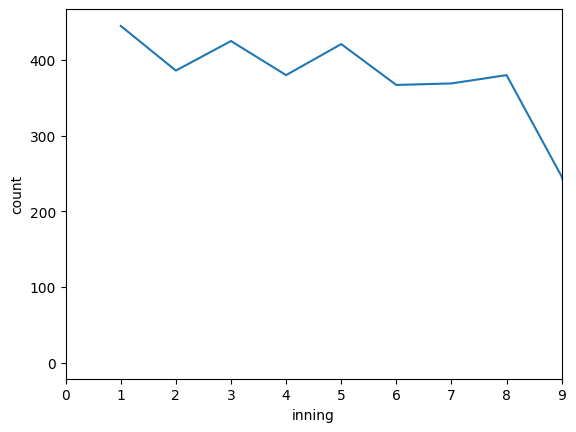

In [69]:
sns.lineplot(hits_data.query('events == "Home Run"').groupby('inning').size().reset_index().rename(columns={0:'count'}),x='inning',y='count')

plt.xlim([0,9])

In [60]:
(
    hits_data.groupby('home_team')['events']
    .count()
    .reset_index()
    .merge(hits_data.query('events == "Home Run"')
                    .groupby('home_team').size().reset_index())
    .rename(columns={0:'dingers'})
    .assign(dinger_perc = lambda x: round(x['dingers'] / x['events'] * 100,2))
    .sort_values('dinger_perc',ascending=False)
)

,home_team,events,dingers,dinger_perc
28,TOR,520,149,28.65
5,CIN,558,155,27.78
2,BAL,517,143,27.66
4,CHC,463,128,27.65
12,LAA,537,145,27.00
13,LAD,529,140,26.47
18,NYY,532,133,25.00
8,CWS,499,123,24.65
6,CLE,488,119,24.39
20,PHI,420,100,23.81


In [32]:
hits_data.query('events == "Home Run"').groupby('home_team').size().sort_values()

home_team
MIA     73
NYM     73
STL     83
DET     88
PIT     90
KC      93
TB      95
SF      96
ARI     99
PHI    100
BOS    109
SEA    112
TEX    113
SD     114
MIL    114
CLE    119
COL    120
OAK    122
CWS    123
WSH    123
CHC    128
HOU    129
NYY    133
ATL    136
LAD    140
BAL    143
MIN    144
LAA    145
TOR    149
CIN    155
dtype: int64

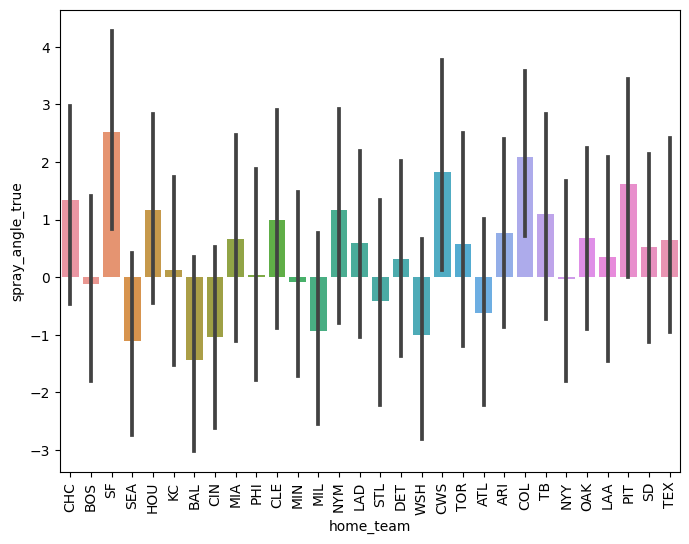

In [29]:
plt.figure(figsize=(8,6))

sns.barplot(hits_data, x='home_team', y='spray_angle_true', estimator='mean', errorbar=('ci',90))

plt.xticks(rotation=90)

plt.show()
